In [2]:
pip install diagrams


Note: you may need to restart the kernel to use updated packages.


In [3]:
from diagrams import Diagram, Edge, Cluster
from diagrams.onprem.network import Internet, Apache, Nginx
from diagrams.aws.security import FirewallManager, ShieldAdvanced, IAMPermissions
from diagrams.k8s.compute import ReplicaSet, Pod 
from diagrams.onprem.database import MySQL, PostgreSQL
from diagrams.onprem.container import Docker
from diagrams.generic.network import Firewall, Subnet
from diagrams.k8s.clusterconfig import HPA

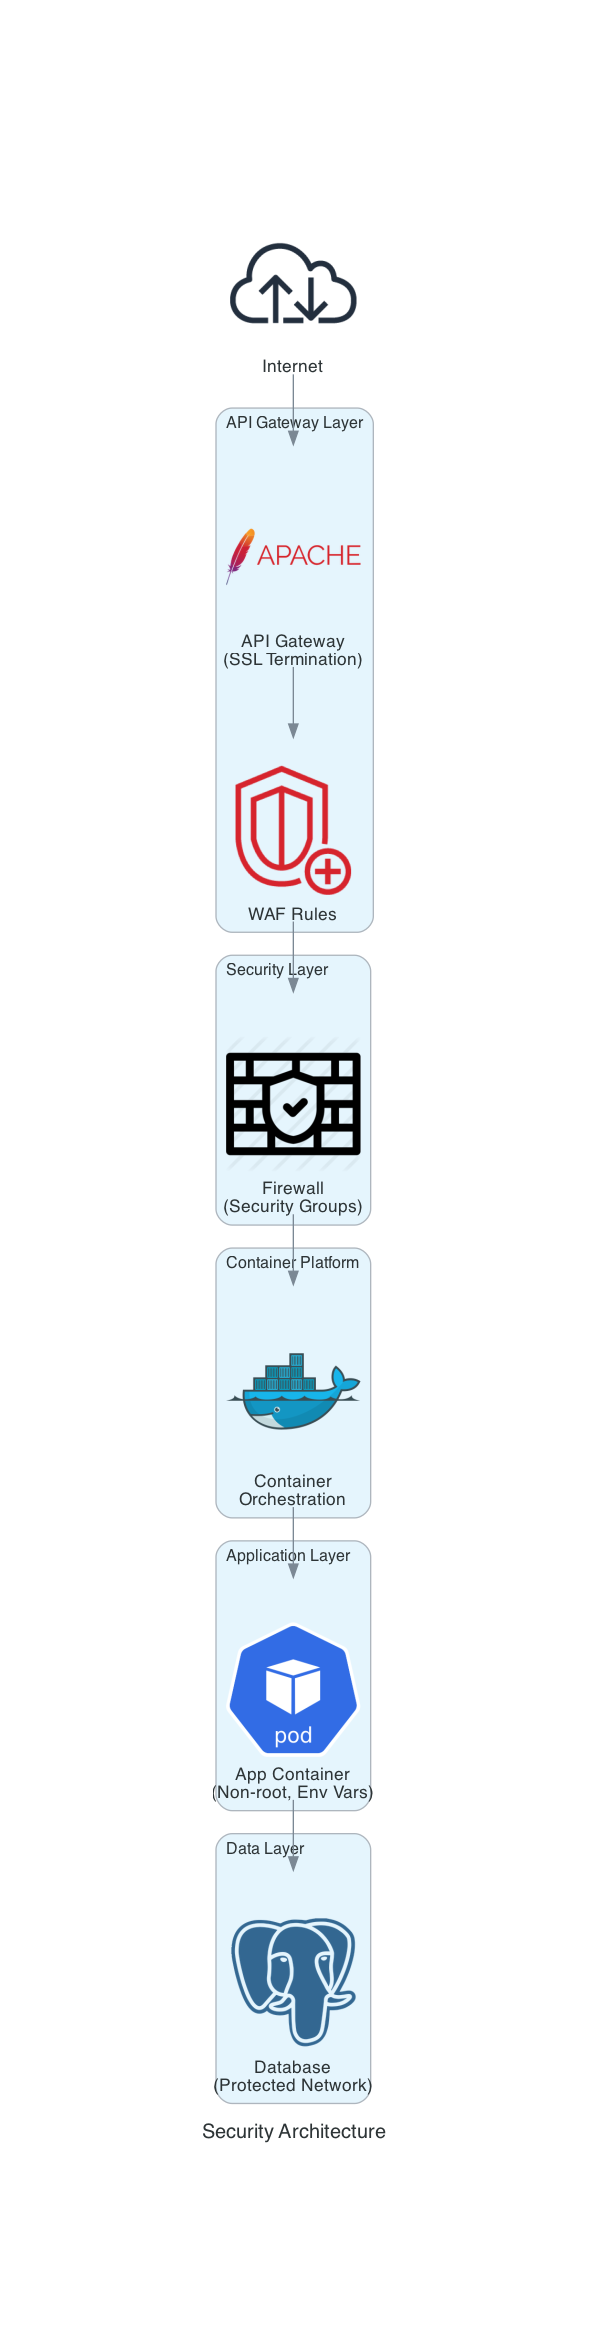

In [ ]:
# Option 1: Using Diagrams library (recommended for best visuals)


# Option 1a: Modern diagram with clusters
with Diagram("Security Architecture", filename="architecture_diagram", show=False, direction="TB"):
    internet = Internet("Internet")
    
    with Cluster("API Gateway Layer"):
        api_gateway = Apache("API Gateway\n(SSL Termination)")
        waf = ShieldAdvanced("WAF Rules")
    
    with Cluster("Security Layer"):
        firewall = Firewall("Firewall\n(Security Groups)")
    
    with Cluster("Container Platform"):
        orchestrator = Docker("Container\nOrchestration")
    
    with Cluster("Application Layer"):
        app_container = Pod("App Container\n(Non-root, Env Vars)")
    
    with Cluster("Data Layer"):
        database = PostgreSQL("Database\n(Protected Network)")
    
    # Connect components
    internet >> api_gateway >> waf >> firewall >> orchestrator >> app_container >> database
    
    # Display the diagram
from IPython.display import Image
Image(filename="architecture_diagram.png")
    